# Business Understanding

## Business Objectives

In the wake of the RMS Titanic disaster, British White Line remains committed to providing luxurious transatlantic voyages. However, passenger and crew safety has become an even greater priority. The company is actively seeking a deeper understanding of survivability in similar situations to ensure the highest safety standards are met.

## Situation Assessment

### Resources

* A complete very detailed list of passengers, including their survival status.
* An initial budget of 1 million USD.
* State of the art local hardware and wide range of cloud services.
* An experience team of 10 data scienctists.

### Constraints

* The budget will not be increased and a detailed spending report must be provided at the end of the project.
* Privacy of passengers' data.

### Timeline

* 8 months until the final deadline and monthly presentations since the fourth month.

## Success Criteria

A model with more that 90 percent of accuracy in predicting a passenger survival given its details (attributes).

## Project Plan

1. Data adquisition: Download the data from Kaggle in a format compatible with our tools and keep it available for the entire team and the entire timeline. 
2. Data understanding: Write a comprenhensive report of every attribute and make it available and updatable.
3. Missing data: Complete missing attribute values in a reasonable way and add a description of the process to the Data Understanding Report.
4. Feature Engineering: Increase the number of attributes available for the model and add the correspoinding descriptions to the Data Understanding Report.
5. Modeling and Testing: Train different models on the previously augmented data and test their accuracy. Write a comprenhensive report on all trained models.
6. Repeat phases 3, 4 and 5 until a model reach 90 percent accuracy or until the final deadline.
7. Present a Project Report with the model (if any).

# Data Understanding

## Collect data

Data is downloaded at `titanic.zip`.

## Describe data

### Format

The data is available in two files: train.csv and test.csv. See [Comma-separated values](https://en.wikipedia.org/wiki/Comma-separated_values) for details on the CSV format. The models must be train on the train.csv data and tested on the test.csv data.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
dataset_filepath: str = './titanic/train.csv'
df = pd.read_csv(dataset_filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Types

* survival: Survival (0 = No, 1 = Yes)
* pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* sex: Sex
* Age: Age in years (Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5)
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number 
* fare: Passenger fare 
* cabin: Cabin number 	
* embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## Explore data

Analise numerical data with histograms and their statistical variables (mean, std, etc.)

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


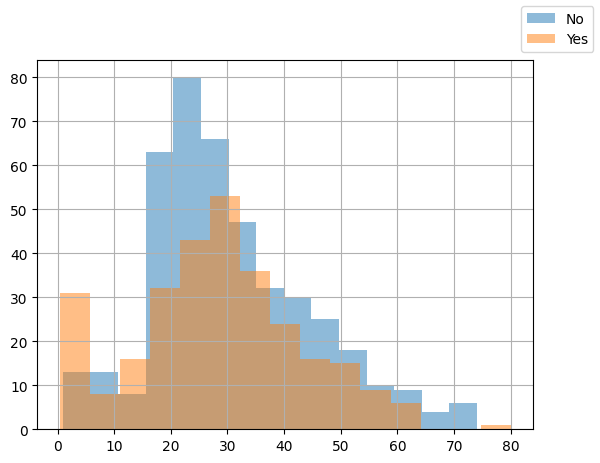

In [30]:
fig, ax = plt.subplots()
df.loc[df['Survived'] == 0]['Age'].hist(bins=15, ax=ax, alpha=0.5, label='No')
df.loc[df['Survived'] == 1]['Age'].hist(bins=15, ax=ax, alpha=0.5, label='Yes')
fig.legend()
# Age does not seen to be a good attribute for values above 30.

<Axes: title={'center': 'Yes'}>

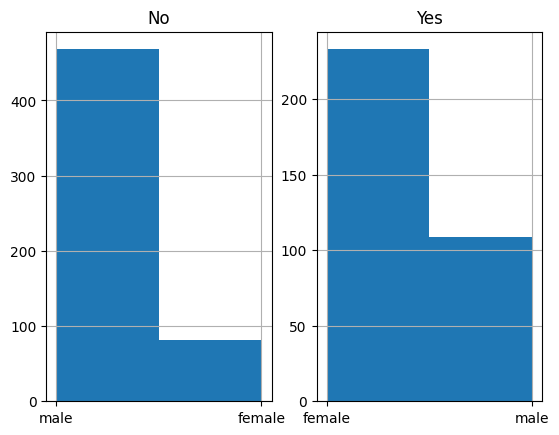

In [45]:
fig, ax = plt.subplots(ncols=2)

ax[0].set_title('No')
df.loc[df['Survived'] == 0]['Sex'].hist(bins=2, ax=ax[0])
# The sex attribute seens to be really good to predict if a male passenger will survive.

ax[1].set_title('Yes')
df.loc[df['Survived'] == 1]['Sex'].hist(bins=2, ax=ax[1])
# The same attribute is also good for a female passenger, but not as good the previous one.